In [20]:
import torch

import matplotlib.pyplot as plt
plt.style.use('./pptnqfe.mplstyle')

from qulearn.hat_basis import HatBasis

# Section 2

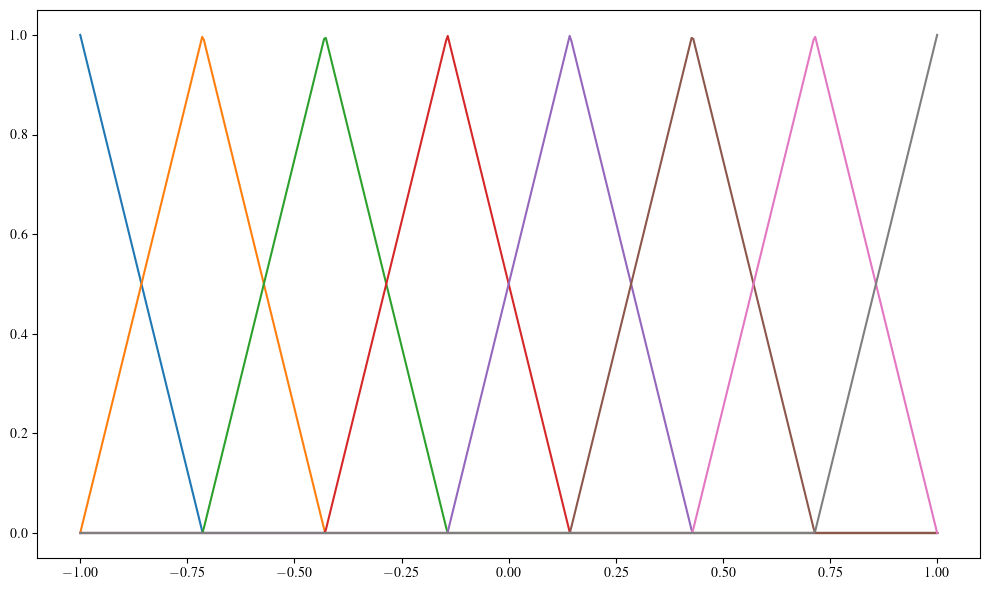

In [21]:
num_qubits = 3
num_nodes = 2**num_qubits
a = -1.0
b = 1.0
hat_basis = HatBasis(a=a, b=b, num_nodes=num_nodes)

num_pnts = 500
xvals = torch.linspace(-1.0, 1.0, num_pnts)
basis_vectors = hat_basis.eval_basis_vector(xvals)

plt.figure(figsize=(10, 6))
for i in range(basis_vectors.shape[1]):
    plt.plot(xvals, basis_vectors[:, i])
plt.tight_layout()
plt.savefig('./figures/hat_basis.pdf', format='pdf', bbox_inches='tight')
plt.show()

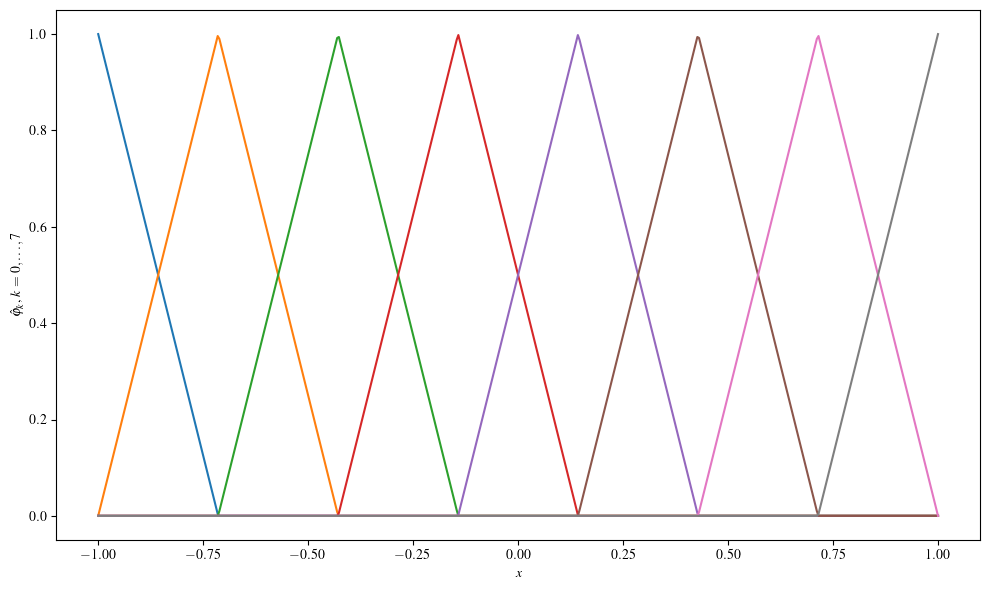

In [22]:
num_qubits = 3
num_nodes = 2**num_qubits
a = -1.0
b = 1.0
hat_basis = HatBasis(a=a, b=b, num_nodes=num_nodes)

num_pnts = 500
xvals = torch.linspace(-1.0, 1.0, num_pnts)
basis_vectors = hat_basis.eval_basis_vector(xvals)

plt.figure(figsize=(10, 6))
for i in range(basis_vectors.shape[1]):
    plt.plot(xvals, basis_vectors[:, i])
plt.xlabel('$x$')
plt.ylabel('$\hat{\\varphi}_k$, $k=0,\ldots,7$')
plt.tight_layout()
plt.show()


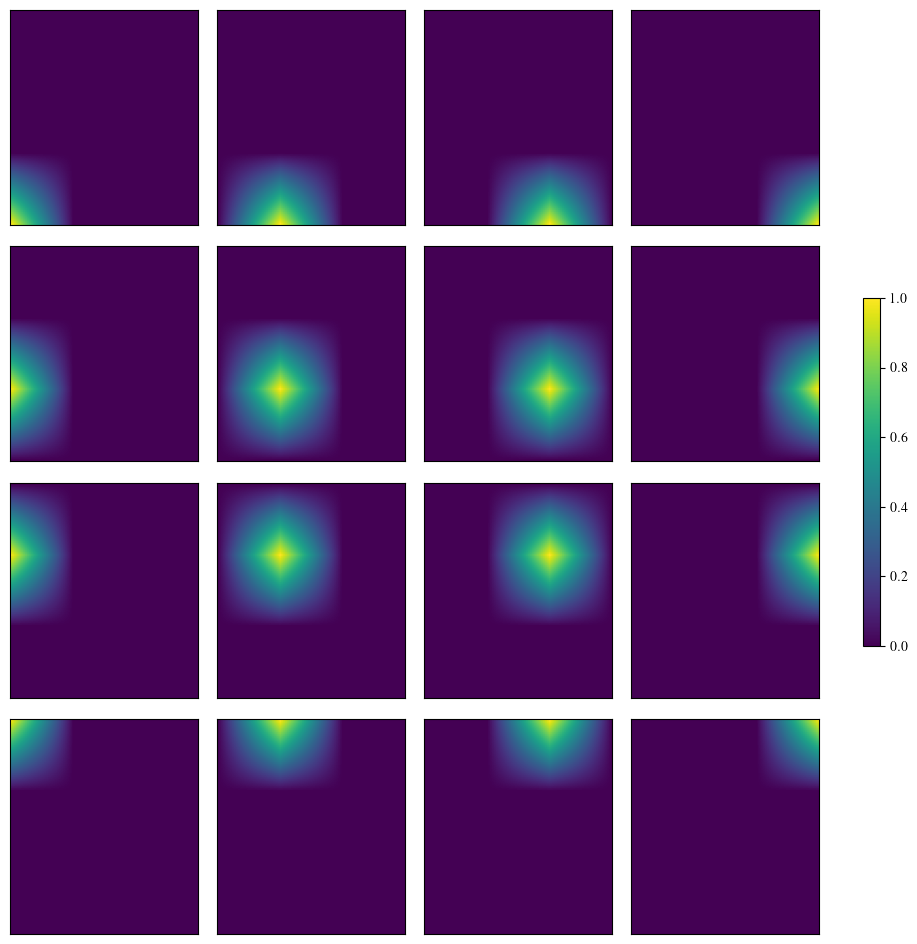

In [23]:
num_qubits = 2
num_nodes = 2**num_qubits
num_pnts = 100

xvals = torch.linspace(a, b, num_pnts)
yvals = torch.linspace(a, b, num_pnts)
X, Y = torch.meshgrid(xvals, yvals)
X = X.flatten()
Y = Y.flatten()

hat_basis = HatBasis(a=a, b=b, num_nodes=num_nodes)
basis_vectors_x = hat_basis.eval_basis_vector(X)
basis_vectors_y = hat_basis.eval_basis_vector(Y)

tensor_products = torch.zeros((num_pnts * num_pnts, num_nodes, num_nodes))
for i in range(num_nodes):
    for j in range(num_nodes):
        tensor_products[:, i, j] = basis_vectors_x[:, i] * basis_vectors_y[:, j]

fig, axes = plt.subplots(num_nodes, num_nodes, figsize=(12, 12), gridspec_kw={'wspace': 0.1, 'hspace': 0.1, 'right': 0.85})
heatmap = None
for i in range(num_nodes):
    for j in range(num_nodes):
        Z = tensor_products[:, i, j].reshape(num_pnts, num_pnts)
        ax = axes[i, j]
        heatmap = ax.imshow(Z.numpy(), extent=[a, b, a, b], origin='lower', aspect='auto')
        ax.set_xticks([])
        ax.set_yticks([])
        
cbar = fig.colorbar(heatmap, ax=axes, orientation='vertical', fraction=0.02, pad=0.05)

plt.savefig('./figures/hat_basis_2Dtp.pdf', format='pdf', bbox_inches='tight')
plt.show()